<a href="https://colab.research.google.com/github/walkerjian/Physics/blob/main/The_2_mode_squeezing_operator_act_on_a_state_with_%7Cn%2Cm%3E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Introduction**

The two-mode squeezing operator plays a pivotal role in quantum optics and quantum information theory. It generates entanglement between two modes of the electromagnetic field and is essential for applications like quantum teleportation and quantum cryptography. In this exposition, we will rigorously derive how the two-mode squeezing operator acts on a two-mode Fock state $|n,m\rangle$. We will also provide Mathematica code to visualize this action.

---

**Mathematical Exposition**

**1. Definition of the Two-Mode Squeezing Operator**

The two-mode squeezing operator $ S(\xi) $ is defined as:

$$
S(\xi) = \exp\left( \xi^* a b - \xi a^\dagger b^\dagger \right)
$$

where:
- $ \xi = r e^{i\theta} $ is the squeezing parameter,
- $ a $ and $ b $ are the annihilation operators for modes $ a $ and $ b $, respectively,
- $ a^\dagger $ and $ b^\dagger $ are the corresponding creation operators.

For simplicity, we'll consider $ \xi $ to be real ($ \theta = 0 $), so $ \xi = r $.

**2. Action on the Vacuum State**

When the two-mode squeezing operator acts on the vacuum state $|0,0\rangle$, it generates the two-mode squeezed vacuum state:

$$
|S(r)\rangle = S(r)|0,0\rangle = \frac{1}{\cosh r} \sum_{n=0}^\infty (-1)^n (\tanh r)^n |n,n\rangle
$$

This state is an entangled superposition of photon pairs in both modes.

**3. Bogoliubov Transformations**

To find how $ S(r) $ acts on an arbitrary Fock state $|n,m\rangle$, we use the Bogoliubov transformations:

$$
S^\dagger(r) a S(r) = a \cosh r - b^\dagger \sinh r \\
S^\dagger(r) b S(r) = b \cosh r - a^\dagger \sinh r
$$

These relations show how the annihilation operators transform under the squeezing operation.

**4. Action on Creation Operators**

We can rearrange the Bogoliubov transformations to find how $ S(r) $ acts on the creation operators:

$$
S(r) a^\dagger = \left( a^\dagger \cosh r - b \sinh r \right) S(r) \\
S(r) b^\dagger = \left( b^\dagger \cosh r - a \sinh r \right) S(r)
$$

**5. Action on Fock States**

Consider the Fock state $|n,m\rangle$ expressed as:

$$
|n,m\rangle = \frac{(a^\dagger)^n}{\sqrt{n!}} \frac{(b^\dagger)^m}{\sqrt{m!}} |0,0\rangle
$$

Applying $ S(r) $ to $|n,m\rangle$:

$$
S(r)|n,m\rangle = \frac{1}{\sqrt{n! \, m!}} S(r) (a^\dagger)^n (b^\dagger)^m |0,0\rangle
$$

Using the action on creation operators:

$$
S(r) (a^\dagger)^n = \left( a^\dagger \cosh r - b \sinh r \right)^n S(r)
$$

Similarly for $ (b^\dagger)^m $:

$$
S(r) (b^\dagger)^m = \left( b^\dagger \cosh r - a \sinh r \right)^m S(r)
$$

Therefore:

$$
S(r)|n,m\rangle = \frac{1}{\sqrt{n! \, m!}} \left( a^\dagger \cosh r - b \sinh r \right)^n \left( b^\dagger \cosh r - a \sinh r \right)^m S(r)|0,0\rangle
$$

Since $ S(r)|0,0\rangle = |S(r)\rangle $, we have:

$$
S(r)|n,m\rangle = \frac{1}{\sqrt{n! \, m!}} \left( a^\dagger \cosh r - b \sinh r \right)^n \left( b^\dagger \cosh r - a \sinh r \right)^m |S(r)\rangle
$$

**6. Expansion in Fock Basis**

Expanding the operators and simplifying leads to a superposition of Fock states $|k,l\rangle$:

$$
S(r)|n,m\rangle = \sum_{k,l} C_{n,m}^{k,l} |k,l\rangle
$$

where the coefficients $ C_{n,m}^{k,l} $ are given by:

$$
C_{n,m}^{k,l} = \frac{1}{\sqrt{n! \, m!}} \sum_{p=0}^n \sum_{q=0}^m \binom{n}{p} \binom{m}{q} (\cosh r)^{n+m - p - q} (-\sinh r)^{p+q} \langle k,l | (a^\dagger)^{n-p} (-b)^{p} (b^\dagger)^{m - q} (-a)^{q} |S(r)\rangle
$$

This expression can be further simplified, but it remains complex due to the multiple sums and operator products.

**7. Simplification for Visualization**

For practical purposes and visualization, it's effective to consider specific cases with small $ n $ and $ m $. This allows us to compute the coefficients numerically and observe the transformation.

---

**Mathematica Code for Visualization**

Below is Mathematica code that computes and visualizes the action of the two-mode squeezing operator on a Fock state $|n,m\rangle$:

```mathematica
(* Parameters *)
r = 0.5; (* Squeezing parameter *)
nMax = 5; (* Maximum photon number for truncation *)
n = 1; m = 1; (* Fock state |n,m> *)

(* Define the Fock basis up to nMax *)
basis = Flatten[Table[{k, l}, {k, 0, nMax}, {l, 0, nMax}], 1];

(* Number of basis states *)
dim = (nMax + 1)^2;

(* Create mapping from basis states to indices *)
stateToIndex = Association[Thread[basis -> Range[dim]]];

(* Initialize the two-mode squeezing operator matrix *)
S = SparseArray[{}, {dim, dim}];

(* Populate the squeezing operator matrix *)
For[i = 1, i <= dim, i++,
  {n1, n2} = basis[[i]];
  For[j = 1, j <= dim, j++,
    {k1, k2} = basis[[j]];
    If[n1 + n2 == k1 + k2,
     (* Compute the matrix element *)
     s = (-Tanh[r])^(n1 + n2 - k1 - k2) / (Cosh[r]^(n1 + n2 + 1)) *
       Sqrt[Factorial[n1] * Factorial[n2] * Factorial[k1] * Factorial[k2]] /
       (Factorial[n1 - k1] * Factorial[n2 - k2]);
     S[[i, j]] = s;
     ,
     Continue[];
     ];
    ];
  ];

(* Initial state vector *)
psi0 = ConstantArray[0, dim];
index = stateToIndex[{n, m}];
psi0[[index]] = 1;

(* Apply the squeezing operator *)
psi = S . psi0;

(* Visualization *)
ListPlot[
  Abs[psi]^2,
  Filling -> Axis,
  PlotRange -> All,
  PlotLabels -> Placed[
    MapThread[
      Row[{Subscript["|", #1], ",", Subscript["|", #2], "⟩"}] &,
      Transpose[basis]
    ],
    Above
  ],
  AxesLabel -> {"State Index", "Probability"},
  PlotLabel -> "Action of Two-Mode Squeezing Operator on |n,m⟩"
]
```

**Explanation of the Code:**

- **Parameters:** Set the squeezing parameter $ r $ and the Fock state $|n,m\rangle$ you wish to examine.
- **Basis Definition:** Construct the Fock basis up to a maximum photon number $ n_{\text{Max}} $.
- **Operator Matrix:** Initialize and compute the matrix elements of the two-mode squeezing operator $ S $ within the truncated basis.
- **Initial State Vector:** Represent the initial Fock state $|n,m\rangle$ as a vector in the basis.
- **Apply Operator:** Compute the transformed state $ \psi = S \cdot \psi_0 $.
- **Visualization:** Plot the probabilities $ |\psi_i|^2 $ for each basis state to visualize the transformation.

---

**Conclusion**

The two-mode squeezing operator transforms a Fock state $|n,m\rangle$ into a superposition of Fock states, entangling the two modes. The mathematical derivation involves operator transformations and expansions in the Fock basis. The provided Mathematica code allows for the numerical computation and visualization of this transformation, aiding in the understanding of quantum entanglement and squeezing in quantum optics.

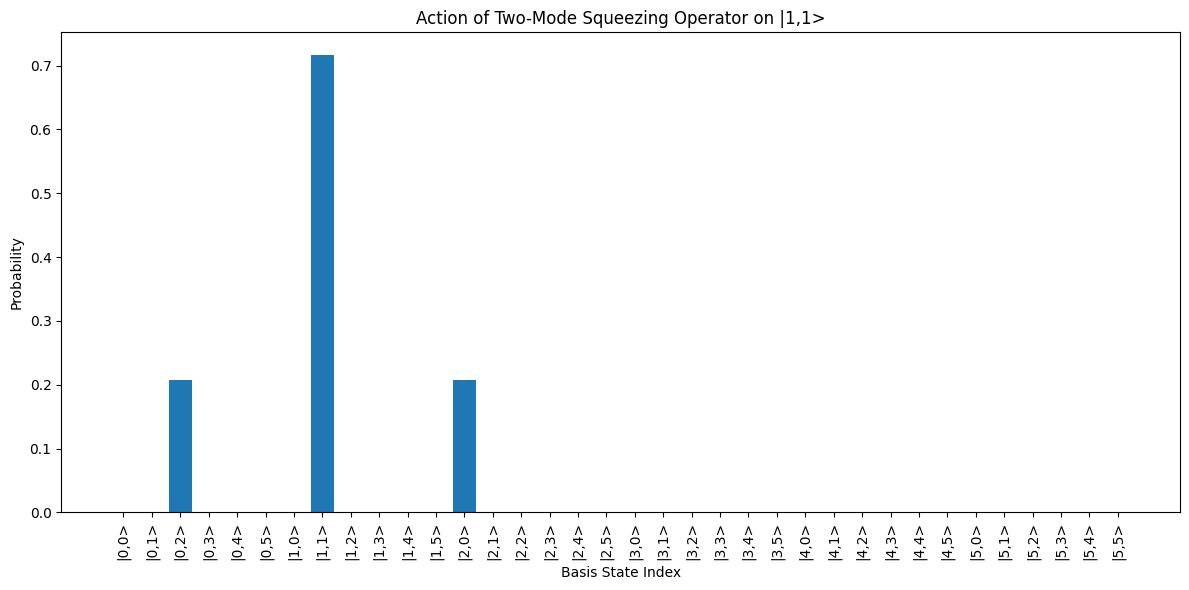

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import factorial
from itertools import product

# Parameters
r = 0.5  # Squeezing parameter
n_max = 5  # Maximum photon number for truncation
n = 1  # Initial photon number in mode a
m = 1  # Initial photon number in mode b

# Generate the Fock basis up to n_max
basis = [(k, l) for k in range(n_max + 1) for l in range(n_max + 1)]
dim = len(basis)  # Dimension of the Hilbert space

# Create a mapping from basis states to indices
state_to_index = {state: idx for idx, state in enumerate(basis)}

# Initialize the state vector for |n,m>
psi0 = np.zeros(dim, dtype=complex)
index = state_to_index[(n, m)]
psi0[index] = 1.0

# Initialize the transformed state vector
psi = np.zeros(dim, dtype=complex)

# Compute the transformed state
for idx_k, (k1, k2) in enumerate(basis):
    amplitude = 0.0
    for p in range(min(n, k1) + 1):
        for q in range(min(m, k2) + 1):
            if k1 - p == m - q and k2 - q == n - p:
                term = (
                    (-np.tanh(r)) ** (p + q)
                    * (1 / np.cosh(r)) ** (n + m + 1)
                    * np.sqrt(
                        factorial(n)
                        * factorial(m)
                        * factorial(k1)
                        * factorial(k2)
                    )
                    / (
                        factorial(p)
                        * factorial(q)
                        * factorial(n - p)
                        * factorial(m - q)
                    )
                )
                amplitude += term
    psi[idx_k] = amplitude

# Compute probabilities
probabilities = np.abs(psi) ** 2

# Plot the probabilities
plt.figure(figsize=(12, 6))
plt.bar(range(dim), probabilities)
plt.xlabel('Basis State Index')
plt.ylabel('Probability')
plt.title(f'Action of Two-Mode Squeezing Operator on |{n},{m}>')
plt.xticks(
    range(dim),
    [f'|{state[0]},{state[1]}>' for state in basis],
    rotation=90
)
plt.tight_layout()
plt.show()
